    Loading libraries and data:

In [41]:
import numpy as np
import os
from python_speech_features import mfcc
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [ ]:
dataset_path = r'TESS Toronto emotional speech set data'

# Get the list of folders/emotions in the dataset
emotions = os.listdir(dataset_path)
print(emotions)

['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'TESS Toronto emotional speech set data', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


    Extracting MFCC Features:

- After conducting research, I realized the significance of extracting MFCCs for analyzing emotional speech. 
- MFCCs extract features such as pitch, energy, and spectral shape, making them suitable for detecting subtle variations in emotional speech.

In [25]:
def extract_mfcc(filename):
    rate, signal = wavfile.read(filename)
    mfcc_feat = mfcc(signal, rate)
    return np.mean(mfcc_feat, axis=0)

In [ ]:

data_path = "TESS Toronto emotional speech set data"
folders = ['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']

X, y = [], []

# Define a function to extract MFCC features using python_speech_features
def extract_mfcc(filename):
    try:
        rate, signal = wavfile.read(filename)
        mfcc_feat = mfcc(signal, rate)
        return np.mean(mfcc_feat, axis=0)
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None

# Iterate through each emotion folder and extract MFCC features
for folder in folders:
    emotion_path = os.path.join(data_path, folder)
    for filename in os.listdir(emotion_path):
        if filename.endswith('.wav'):
            filepath = os.path.join(emotion_path, filename)
            mfcc_feat = extract_mfcc(filepath)
            if mfcc_feat is not None:
                X.append(mfcc_feat)
                y.append(folder.split('_')[-1].lower())

X = np.array(X)
y = np.array(y)

# Encode labels using LabelEncoder and OneHotEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

Error processing C:/Users/hp/Desktop/sem6/PL Lab/lab9/archive (9)/TESS Toronto emotional speech set data\YAF_angry\YAF_germ_angry.wav: File format b'FORM' not understood. Only 'RIFF' and 'RIFX' supported.


Error processing C:/Users/hp/Desktop/sem6/PL Lab/lab9/archive (9)/TESS Toronto emotional speech set data\YAF_fear\YAF_neat_fear.wav: File format b'FORM' not understood. Only 'RIFF' and 'RIFX' supported.


    Define LSTM Model:

In [30]:
print(X_train.shape)

(2238, 13)


In [33]:
num_classes = 8  

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Adjusted to match the number of classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

- 8 classes to represent 8 emotions present in dataset: angry, disgust, fear, happy, neutral, pleasant surprise, and sad.
- LSTM layer with 128 units to capture temporal dependencies in the data. The input shape was set to (X_train.shape[1], 1) to match the input dimensions, where X_train.shape[1] indicated the number of time steps in the input sequence, and 1 represented each time step having one feature.
- I included Dropout regularization by adding a Dropout layer with a dropout rate of 0.2 after the LSTM layer. Dropout helped prevent overfitting by randomly dropping a fraction of input units during training, encouraging the model to learn more robust features.
- The model concluded with a Dense layer containing num_classes units and utilized the softmax activation function. This final layer outputted probabilities for each class, making it suitable for multi-class classification tasks.
- Used categorical cross-entropy as the loss function, Adam optimizer for gradient descent, and accuracy as the metric for monitoring during training and evaluation. Categorical cross-entropy is commonly applied in multi-class classification problems, while Adam optimizer adapts learning rates for each parameter, leading to faster convergence. 

    Model Training and Evaluation:

In [34]:
# Train and evaluate the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/50
70/70 [==============================] - 7s 26ms/step - loss: 1.7218 - accuracy: 0.3552 - val_loss: 1.2556 - val_accuracy: 0.4893
Epoch 2/50
70/70 [==============================] - 1s 14ms/step - loss: 1.1292 - accuracy: 0.5827 - val_loss: 0.9344 - val_accuracy: 0.6589
Epoch 3/50
70/70 [==============================] - 1s 14ms/step - loss: 0.8664 - accuracy: 0.6841 - val_loss: 0.7544 - val_accuracy: 0.7054
Epoch 4/50
70/70 [==============================] - 1s 14ms/step - loss: 0.7513 - accuracy: 0.7265 - val_loss: 0.6331 - val_accuracy: 0.7768
Epoch 5/50
70/70 [==============================] - 1s 13ms/step - loss: 0.6202 - accuracy: 0.7793 - val_loss: 0.5666 - val_accuracy: 0.8018
Epoch 6/50
70/70 [==============================] - 1s 13ms/step - loss: 0.5400 - accuracy: 0.8146 - val_loss: 0.5723 - val_accuracy: 0.8125
Epoch 7/50
70/70 [==============================] - 1s 12ms/step - loss: 0.4918 - accuracy: 0.8333 - val_loss: 0.4672 - val_accuracy: 0.8250
Epoch 8/50
70

    Visualizations:

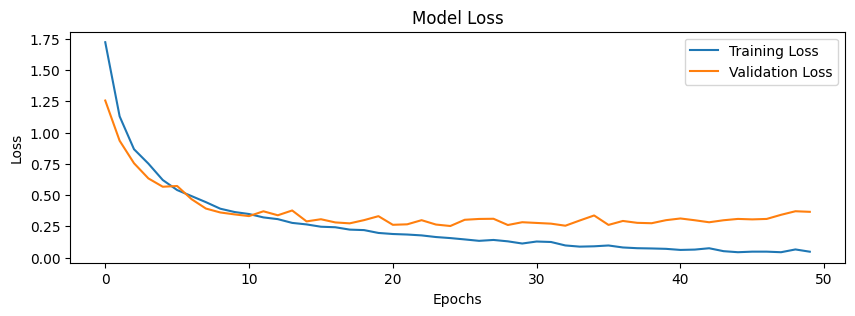

In [40]:

# Plot training & validation loss values
plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

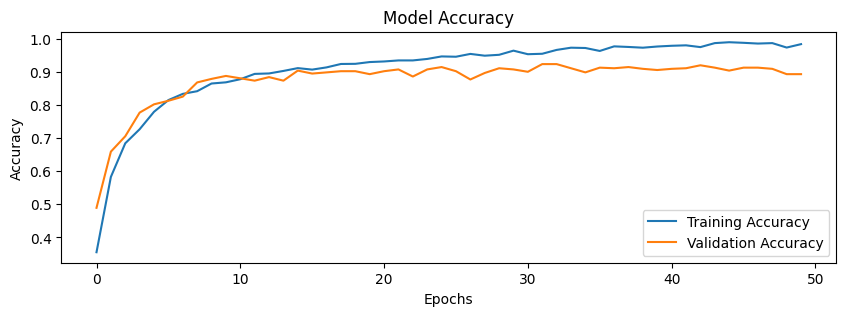

In [39]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()